# **Tarea 1 Inteligencia Artificial**
### Ayudante: Nicolás Araya ! Profesor: Martín Gutierrez
#### Alumno: Tomás Fuentes Araya

# **Introducción**

En el presente informe se presenta una red bayesiana, generada a partir del dataset "Yu-Gi-Oh! Trading Cards Dataset" en el cual se presenta información de aproximadamente 6000 cartas del famoso juego y serie de televisión. Para la correcta utilización del dataset, fue necesario una previa modificación de los datos (los cuales será especificado más adelante.)\
Para poder trabajar este dataset, se utilizara la libreria "bnlearn" de python la cual nos permite crear y montar graficamente la red bayesiana, además de poder entrenar nuestro modelo y realizar inferencias respecto a este para un correcto estudio.

# **Desarrollo**

Para dar inicio al desarrollo de esta actividad, los bloques de código [1], [2] y [3], realizan la instalación de las dependencias necesarias, ademas de solicitar el archivo para descargar el dataset y la descarga y descompresión de este último.


In [1]:
%%capture

!pip install -U bnlearn
!pip install -U matplotlib

In [2]:
from google.colab import files 
files.upload()

!pip install -q kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d tathor/yugioh-trading-cards-dataset
!unzip /content/yugioh-trading-cards-dataset.zip

  0% 0.00/91.3k [00:00<?, ?B/s]
100% 91.3k/91.3k [00:00<00:00, 57.6MB/s]
Archive:  /content/yugioh-trading-cards-dataset.zip
  inflating: card_data.csv           


Desde aquí comienza el trabajo con el dataset, en [4] se importan las librerias necesarias para realizar el estudio y manejo del dataset. Mientras que en [5] se realiza la lectura del dataset y se llenan todos los spacios "NaN" con el valor 0.

In [4]:
%%capture

import pandas as pd
import bnlearn as bn
import numpy as np

In [5]:
#Lectura del dataset
df = pd.read_csv('card_data.csv')
df = df.fillna(0)
df

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0.0,Continuous,0,0.0,0.0
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,0.0,Normal,0,0.0,0.0
3,Magician's Circle,Trap Card,0.0,Normal,0,0.0,0.0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0.0,Counter,0,0.0,0.0
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400.0,0.0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500.0,2100.0
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500.0,2000.0


Los bloques [6], [7], [8], [9] y [10] son utilizados para generar listas de aquellos datos que seran modificados para mejorar la lectura y trabajo del dataset. Los datos son el tipo de la carta (Type), la raza (Race), atributo (Attribute), ataque (ATK) y defensa (DEF). La idea de estas listas es utilizar el valor "index" de cada dato y reemplazarlo por su valor en el dataset.

In [6]:
dups_Type = df.pivot_table(columns=['Type'], aggfunc='size')

tipos = []
for tipo in df['Type']:
  if tipo not in tipos:
    tipos.append(tipo)   

print(tipos) 
print(dups_Type)

['Trap Card', 'Normal Monster', 'Flip Effect Monster', 'Effect Monster', 'Spell Card', 'Tuner Monster', 'Token', 'Synchro Monster', 'XYZ Monster', 'Pendulum Effect Monster', 'Fusion Monster', 'Normal Tuner Monster', 'Spirit Monster', 'Union Effect Monster', 'Ritual Monster', 'Ritual Effect Monster', 'Gemini Monster', 'Toon Monster', 'Pendulum Normal Monster', 'Pendulum Flip Effect Monster', 'Synchro Tuner Monster', 'XYZ Pendulum Effect Monster', 'Pendulum Tuner Effect Monster', 'Synchro Pendulum Effect Monster']
Type
Effect Monster                     2494
Flip Effect Monster                 118
Fusion Monster                      225
Gemini Monster                       33
Normal Monster                      533
Normal Tuner Monster                  8
Pendulum Effect Monster             105
Pendulum Flip Effect Monster          1
Pendulum Normal Monster              25
Pendulum Tuner Effect Monster         1
Ritual Effect Monster                36
Ritual Monster                       

In [7]:
dups_Race = df.pivot_table(columns=['Race'], aggfunc='size')

razas = []
for raza in df['Race']:
  if raza not in razas:
    razas.append(raza)   
print(razas)    
print(dups_Race)

['Continuous', 'Zombie', 'Normal', 'Fiend', 'Quick-Play', 'Rock', 'Warrior', 'Winged Beast', 'Spellcaster', 'Beast', 'Fairy', 'Equip', 'Field', 'Fish', 'Beast-Warrior', 'Thunder', 'Machine', 'Sea Serpent', 'Aqua', 'Plant', 'Dragon', 'Reptile', 'Counter', 'Psychic', 'Insect', 'Pyro', 'Dinosaur', 'Wyrm', 'Ritual', 'Divine-Beast', 'Cyberse']
Race
Aqua              155
Beast             234
Beast-Warrior     147
Continuous        445
Counter            89
Cyberse             1
Dinosaur           67
Divine-Beast       10
Dragon            343
Equip             161
Fairy             252
Field             120
Fiend             410
Fish               79
Insect            131
Machine           516
Normal           1126
Plant             138
Psychic            78
Pyro               91
Quick-Play        187
Reptile           107
Ritual             44
Rock              149
Sea Serpent        49
Spellcaster       394
Thunder            81
Warrior           600
Winged Beast      182
Wyrm            

In [8]:
dups_Attribute = df.pivot_table(columns=['Attribute'], aggfunc='size')

atributos = []
for atributo in df['Attribute']:
  if atributo not in atributos:
    if atributo != 0:
      atributos.append(atributo)   
print(atributos)    
print(dups_Attribute)

['DARK', 'FIRE', 'EARTH', 'WIND', 'LIGHT', 'WATER', 'DIVINE']
Attribute
0         2259
DARK      1117
DIVINE      10
EARTH     1101
FIRE       355
LIGHT      849
WATER      442
WIND       401
dtype: int64


In [9]:
dups_ATK = df.pivot_table(columns=['ATK'], aggfunc='size')

atks = []

for ataque in df['ATK']:
  if ataque not in atks:
    atks.append(ataque)

atks.sort()
print(atks)
print(dups_ATK)

[0.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 920.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1380.0, 1400.0, 1450.0, 1500.0, 1550.0, 1600.0, 1610.0, 1650.0, 1700.0, 1750.0, 1800.0, 1850.0, 1900.0, 1950.0, 2000.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0, 2300.0, 2350.0, 2400.0, 2450.0, 2500.0, 2550.0, 2600.0, 2650.0, 2700.0, 2750.0, 2800.0, 2850.0, 2900.0, 2950.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3750.0, 3800.0, 4000.0, 4200.0, 4400.0, 4500.0, 4600.0, 5000.0]
ATK
0.0       2551
100.0      122
150.0        1
200.0       71
250.0        1
          ... 
4200.0       1
4400.0       1
4500.0       7
4600.0       1
5000.0       4
Length: 77, dtype: int64


In [10]:
dups_DEF = df.pivot_table(columns=['DEF'], aggfunc='size')

defs = []

for defensa in df['DEF']:
  if defensa not in defs:
    defs.append(defensa)

defs.sort()
print(defs)
print(dups_DEF)

[0.0, 100.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1460.0, 1500.0, 1530.0, 1550.0, 1600.0, 1650.0, 1700.0, 1800.0, 1850.0, 1900.0, 1930.0, 1950.0, 2000.0, 2030.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0, 2300.0, 2350.0, 2400.0, 2450.0, 2500.0, 2550.0, 2600.0, 2700.0, 2800.0, 2900.0, 2950.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3700.0, 3800.0, 3850.0, 4000.0, 4100.0, 5000.0]
DEF
0.0       2618
100.0      132
200.0      137
250.0        4
300.0       99
          ... 
3800.0       4
3850.0       1
4000.0      23
4100.0       1
5000.0       4
Length: 70, dtype: int64


Una vez creada cada lista se procede a realizar el cambio de valores en las columnas correspondientes. En el bloque [11] se realiza el cambio gracias a la función apply, la cual recibe una función que retorna el nuevo valor para la fila a cambiar. Es importante mencionar que se utiliza una función diferente para cada columna.

In [11]:
 def change_Type(row, lista):
  return lista.index(row.Type)

df['Type'] = df.apply(lambda row: change_Type(row, tipos), axis=1)

def change_Race(row, lista):
  return lista.index(row.Race)

df['Race'] = df.apply(lambda row: change_Race(row, razas), axis=1)

def change_Attribute(row, lista):
  if row.Attribute in lista:
    return lista.index(row.Attribute)+1

df['Attribute'] = df.apply(lambda row: change_Attribute(row, atributos), axis=1)

def change_ATK(row, lista):
  return lista.index(row.ATK)

df['ATK'] = df.apply(lambda row: change_ATK(row, atks), axis=1)

def change_DEF(row, lista):
  return lista.index(row.DEF)

df['DEF'] = df.apply(lambda row: change_DEF(row, defs), axis=1)

df


,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,0,0.0,0,NaN,0,0
1,The 13th Grave,1,3.0,1,1.0,24,16
2,Gem-Enhancement,0,0.0,2,NaN,0,0
3,Magician's Circle,0,0.0,2,NaN,0,0
4,Castle of Dark Illusions,2,4.0,3,1.0,18,38
...,...,...,...,...,...,...,...
6529,Wattcancel,0,0.0,22,NaN,0,0
6530,Paleozoic Anomalocaris,8,2.0,18,6.0,50,0
6531,Dark Magician,1,7.0,8,1.0,52,43
6532,Odd-Eyes Pendulum Dragon,9,7.0,20,1.0,52,40


Finalmente se realiza la eliminación de la columna "Name" del dataset, puesto que esta no aporta ningún dato relevante que sea necesario para el estudio que se esta realizando. 

In [12]:
df = df.fillna(0)
df.drop('Name', inplace=True, axis=1)
df

,Type,Level,Race,Attribute,ATK,DEF
0,0,0.0,0,0.0,0,0
1,1,3.0,1,1.0,24,16
2,0,0.0,2,0.0,0,0
3,0,0.0,2,0.0,0,0
4,2,4.0,3,1.0,18,38
...,...,...,...,...,...,...
6529,0,0.0,22,0.0,0,0
6530,8,2.0,18,6.0,50,0
6531,1,7.0,8,1.0,52,43
6532,9,7.0,20,1.0,52,40


Una vez listo el dataset, se procede a la construcción y entrenamiento de nuestra red bayesiana. En el bloque [13] podemos ver el resultado del modelo ya construido. Y en el bloque [14] podemos observar el entrenamiento de nuestro modelo con nuestro dataset editado.

In [13]:
%%capture
model = bn.structure_learning.fit(df)



[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


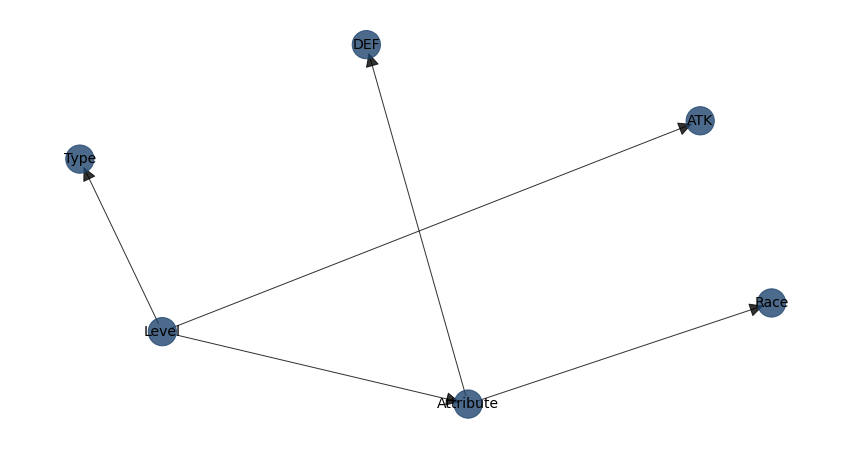

In [14]:
G = bn.plot(model)

In [15]:
%%capture

model_update = bn.parameter_learning.fit(model, df)

In [16]:
Gg = bn.plot(model_update, interactive=True, params_interactive={'notebook':True}) 

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


Para la realización de las inferencias, hay que tomar en cuenta los siguientes cambios que hubieron en el dataset. Es importante conocerlos con anticipación ya que nos permitira realizar las consultas de manera más comoda. A continuación se presentan los valores nuevos para cada columna que fue editada:


## Tipo de carta

Trap Card 0\
Normal Monster 1\
Flip Effect Monster 2\
Effect Monster 3\
Spell Card 4\
Tuner Monster 5\
Token 6\
Synchro Monster 7\
XYZ Monster 8\
Pendulum Effect Monster 9\
Fusion Monster 10\
Normal Tuner Monster 11\
Spirit Monster 12\
Union Effect Monster 13\
Ritual Monster 14\
Ritual Effect Monster 15\
Gemini Monster 16\
Toon Monster 17\
Pendulum Normal Monster 18\
Pendulum Flip Effect Monster 19\
Synchro Tuner Monster 20\
XYZ Pendulum Effect Monster 21\
Pendulum Tuner Effect Monster 22\
Synchro Pendulum Effect Monster 23

## Raza de la carta

Continuous 0\
Zombie 1\
Normal 2\
Fiend 3\
Quick-Play 4\
Rock 5\
Warrior 6\
Winged Beast 7\
Spellcaster 8\
Beast 9\
Fairy 10\
Equip 11\
Field 12\
Fish 13\
Beast-Warrior 14\
Thunder 15\
Machine 16\
Sea Serpent 17\
Aqua 18\
Plant 19\
Dragon 20\
Reptile 21\
Counter 22\
Psychic 23\
Insect 24\
Pyro 25\
Dinosaur 26\
Wyrm 27\
Ritual 28\
Divine-Beast 29\
Cyberse 30

## Atributo de la carta
##### (importante mencionar que a esta columna se le sumo 1 puesto que habian valores que ya eran 0 con antelación)

DARK 1\
FIRE 2\
EARTH 3\
WIND 4\
LIGHT 5\
WATER 6\
DIVINE 7

## Ataque de la carta

0 0\
100 1\
150 2\
200 3\
250 4\
300 5\
350 6\
400 7\
450 8\
500 9\
550 10\
600 11\
650 12\
700 13\
750 14\
800 15\
850 16\
900 17\
920 18\
950 19\
1000 20\
1050 21\
1100 22\
1150 23\
1200 24\
1250 25\
1300 26\
1350 27\
1380 28\
1400 29\
1450 30\
1500 31\
1550 32\
1600 33\
1610 34\
1650 35\
1700 36\
1750 37\
1800 38\
1850 39\
1900 40\
1950 41\
2000 42\
2050 43\
2100 44\
2150 45\
2200 46\
2250 47\
2300 48\
2350 49\
2400 50\
2450 51\
2500 52\
2550 53\
2600 54\
2650 55\
2700 56\
2750 57\
2800 58\
2850 59\
2900 60\
2950 61\
3000 62\
3100 63\
3200 64\
3300 65\
3400 66\
3500 67\
3600 68\
3750 69\
3800 70\
4000 71\
4200 72\
4400 73\
4500 74\
4600 75\
5000 76

## Defensa de la carta

0 0\
100 1\
200 2\
250 3\
300 4\
350 5\
400 6\
450 7\
500 8\
550 9\
600 10\
650 11\
700 12\
750 13\
800 14\
850 15\
900 16\
950 17\
1000 18\
1050 19\
1100 20\
1150 21\
1200 22\
1250 23\
1300 24\
1350 25\
1400 26\
1450 27\
1460 28\
1500 29\
1530 30\
1550 31\
1600 32\
1650 33\
1700 34\
1800 35\
1850 36\
1900 37\
1930 38\
1950 39\
2000 40\
2030 41\
2050 42\
2100 43\
2150 44\
2200 45\
2250 46\
2300 47\
2350 48\
2400 49\
2450 50\
2500 51\
2550 52\
2600 53\
2700 54\
2800 55\
2900 56\
2950 57\
3000 58\
3100 59\
3200 60\
3300 61\
3400 62\
3500 63\
3700 64\
3800 65\
3850 66\
4000 67\
4100 68\
5000 69

Nuestra primera inferencia será determinar la probabilidad que la carta sea de alguna de las razas posibles si sabemos que el tipo de la carta es un "Monstruo XYZ" (valor 8 como se muestra a continuación)

In [17]:
q_1 = bn.inference.fit(model_update, variables=['Race'], evidence={'Type':8})
print(q_1)

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+--------+------------+
|    |   Race |          p |
+====+========+============+
|  0 |      0 | 0.0117673  |
+----+--------+------------+
|  1 |      1 | 0.0273587  |
+----+--------+------------+
|  2 |      2 | 0.0217381  |
+----+--------+------------+
|  3 |      3 | 0.0782283  |
+----+--------+------------+
|  4 |      4 | 0.00798981 |
+----+--------+------------+
+----------+-------------+
| Race     |   phi(Race) |
+==========+=============+
| Race(0)  |      0.0118 |
+----------+-------------+
| Race(1)  |      0.0274 |
+----------+-------------+
| Race(2)  |      0.0217 |
+----------+-------------+
| Race(3)  |      0.0782 |
+----------+-------------+
| Race(4)  |      0.0080 |
+----------+-------------+
| Race(5)  |      0.0334 |
+----------+-------------+
| Race(6)  |      0.1179 |
+----------+-------------+
| Race(7)  |      0.0383 |
+----------+-------------+
| Race(8)  |      0.0786 |
+----------+-------------+
| Race(9)  |      0.0474 |
+----------+-------------+
| 

Los valores obtenidos con la primera consulta, nos muestra como se distribuye cada raza de carta dado el tipo que teniamos como evidencia. Podemos observar que aquellos valores más pequeños corresponden a cartas que nunca podran cumplir con el tipo dado, esto es debido a que las reglas del juego estipulan que los "Monstruos XYZ" no pueden ser cartas mágicas, o trampas.

Que sucede con la siguiente query, como se distribuyen las diferentes razas de las cartas a partir del atributo "Light", y al igual que lo que vimos anteriormente, los porcentajes más bajos corresponden a cartas que no tienen o no pueden tener atributos. Como lo son por ejemplo cartas mágicas de equipo, continuas, de campo, etc y las cartas de trampa continuas o de juego de rapido.

In [18]:
q_2 = bn.inference.fit(model_update, variables=['Race'], evidence={'Attribute': 5})
print(q_2)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+--------+------------+
|    |   Race |          p |
+====+========+============+
|  0 |      0 | 0.0041399  |
+----+--------+------------+
|  1 |      1 | 0.00721998 |
+----+--------+------------+
|  2 |      2 | 0.0041399  |
+----+--------+------------+
|  3 |      3 | 0.0380208  |
+----+--------+------------+
|  4 |      4 | 0.0041399  |
+----+--------+------------+
+----------+-------------+
| Race     |   phi(Race) |
+==========+=============+
| Race(0)  |      0.0041 |
+----------+-------------+
| Race(1)  |      0.0072 |
+----------+-------------+
| Race(2)  |      0.0041 |
+----------+-------------+
| Race(3)  |      0.0380 |
+----------+-------------+
| Race(4)  |      0.0041 |
+----------+-------------+
| Race(5)  |      0.0113 |
+----------+-------------+
| Race(6)  |      0.1335 |
+----------+-------------+
| Race(7)  |      0.0134 |
+----------+-------------+
| Race(8)  |      0.1068 |
+----------+-------------+
| Race(9)  |      0.0524 |
+----------+-------------+
| 

Para esta tercer query, se busca inferir el nivel de las cartas dado el ataque que es de 3600 (número 66 como se muestra) y el tipo "Synchro Tuner Monster".\
Lo que podemos visualizar en este caso, la probabilidad por nivel se ve afectada mayoritariamente por el ataque, sin embargo dado que tambien conocemos el tipo de la carta, esto nos permite entender la razón del porque se distribuye de esta forma los porcentajes. En general en el juego de cartas, este tipo de cartas con este ataque, tienden a ser cartas que fuertes y de mayor nivel, y por eso se debe la concetración en los niveles 9, 10 ,11 y 12.

In [19]:
q_3 = bn.inference.fit(model_update, variables=['Level'], evidence={'ATK':66, "Type":20})
print(q_3)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+---------+-----------+
|    |   Level |         p |
+====+=========+===========+
|  0 |       0 | 0.0059428 |
+----+---------+-----------+
|  1 |       1 | 0.0372247 |
+----+---------+-----------+
|  2 |       2 | 0.047771  |
+----+---------+-----------+
|  3 |       3 | 0.0232037 |
+----+---------+-----------+
|  4 |       4 | 0.0154315 |
+----+---------+-----------+
+-------------+--------------+
| Level       |   phi(Level) |
+=============+==============+
| Level(0.0)  |       0.0059 |
+-------------+--------------+
| Level(1.0)  |       0.0372 |
+-------------+--------------+
| Level(2.0)  |       0.0478 |
+-------------+--------------+
| Level(3.0)  |       0.0232 |
+-------------+--------------+
| Level(4.0)  |       0.0154 |
+-------------+--------------+
| Level(5.0)  |       0.0642 |
+-------------+--------------+
| Level(6.0)  |       0.0399 |
+-------------+--------------+
| Level(7.0)  |       0.0419 |
+-------------+--------------+
| Level(8.0)  |       0.0916 |
+--

Nuestra cuarta inferencia es con respecto al atributo de la carta, para ello se realiza consulta sabiendo que el ataque de la carta es de 2100 (número 44 de la lista) y la raza es de tipo dragón (número 20 de la lista). Para este caso podemos visualizar el porcentaje de cartas "Dragón" que hay por cada atributo, donde podemos ver una mayor concenetración en el atributo "Dark" (número 1). La baja concentración en el atributo 0 se debe a que ese valor se genera cuando se cambian los "NaN" por 0, es decir corresponden a cartas mágicas o trampa que no pueden tener atributos y tampoco ataque o raza.

In [20]:
q_4 = bn.inference.fit(model_update, variables=['Attribute'], evidence={'ATK':44, "Race":20})
print(q_4)

[bnlearn] >Variable Elimination..


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----+-------------+-------------+
|    |   Attribute |           p |
+====+=============+=============+
|  0 |           0 | 0.000934192 |
+----+-------------+-------------+
|  1 |           1 | 0.328104    |
+----+-------------+-------------+
|  2 |           2 | 0.110347    |
+----+-------------+-------------+
|  3 |           3 | 0.082718    |
+----+-------------+-------------+
|  4 |           4 | 0.171373    |
+----+-------------+-------------+
+----------------+------------------+
| Attribute      |   phi(Attribute) |
+================+==================+
| Attribute(0.0) |           0.0009 |
+----------------+------------------+
| Attribute(1.0) |           0.3281 |
+----------------+------------------+
| Attribute(2.0) |           0.1103 |
+----------------+------------------+
| Attribute(3.0) |           0.0827 |
+----------------+------------------+
| Attribute(4.0) |           0.1714 |
+----------------+------------------+
| Attribute(5.0) |           0.2452 |
+------------

La quinta inferencia es sobre el ataque de la carta, para ello se utiliza como evidencia la defensa de la carta, que es de 2500 (número 51), el tipo es "Effect Monster" (o monstruo de efecto) y el nivel de este es 8. Podemos apreciar que solo dos "ATK" presentan una clara concentración de cartas, estás corresponden a 2800 y 3000 (58 y 62 respectivamente), esto se debe a que comunmente una defensa tan alta y un nivel tan alto permiten que un monstruo de efecto, presente puntos de ataque elevados, sin embargo no quita el hecho de que algunas cartas presentan bajos puntos, que es lo que podemos en la tabla siguiente.

In [21]:
q_5 = bn.inference.fit(model_update, variables=['ATK'], evidence={'DEF':51, "Type":3, "Level": 8})
print(q_5)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+-------+------------+
|    |   ATK |          p |
+====+=======+============+
|  0 |     0 | 0.0477454  |
+----+-------+------------+
|  1 |     1 | 0.00753664 |
+----+-------+------------+
|  2 |     2 | 0.00251054 |
+----+-------+------------+
|  3 |     3 | 0.00251054 |
+----+-------+------------+
|  4 |     4 | 0.00251054 |
+----+-------+------------+
+---------+------------+
| ATK     |   phi(ATK) |
+=========+============+
| ATK(0)  |     0.0477 |
+---------+------------+
| ATK(1)  |     0.0075 |
+---------+------------+
| ATK(2)  |     0.0025 |
+---------+------------+
| ATK(3)  |     0.0025 |
+---------+------------+
| ATK(4)  |     0.0025 |
+---------+------------+
| ATK(5)  |     0.0025 |
+---------+------------+
| ATK(6)  |     0.0025 |
+---------+------------+
| ATK(7)  |     0.0025 |
+---------+------------+
| ATK(8)  |     0.0025 |
+---------+------------+
| ATK(9)  |     0.0050 |
+---------+------------+
| ATK(10) |     0.0025 |
+---------+------------+
| ATK(11) |

# **Conclusión**

A niveles generales de lo que fue el modelo podemos observar que nuestra raíz del árbol corresponde al nivel de la carta, sin embargo ¿A que se debe esto? para comprenderlo tenemos que entender un poco como funciona el juego de cartas. Dentro de este, para que una carta tenga raza, tipo, atributo, etc. debe tener un nivel distinto de 0. Es por ello que podemos deducir y aseverar que existe una dependencia por parte de los datos hacia el nivel que puede tener la carta.

Gracias a las diferentes inferencias realizadas, podemos lograr ver y entender como se cumple lo mencionado anteriormente y a medida que realizamos inferencias con un mayor número de evidencias podemos detectar que aumenta la precisión de la "realidad".